In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/capstoneproject/data.csv')

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string
nltk.download('stopwords')
stop=set(stopwords.words('english'))

def preprocess_text(text):
      corpus=[]
      #stem=PorterStemmer()
      lem=WordNetLemmatizer()
      for news in text:
          words=[w for w in word_tokenize(news) if (w not in stop)]
          
          words=[lem.lemmatize(w) for w in words if len(w)>2]
          words = [''.join(c for c in s if c not in string.punctuation) for s in words if s]
          words = [word.lower() for word in words]
          words = [word for word in words if word.isalpha()]
          corpus.append(words) 
         
      return corpus     
      
data1['processed_text']= preprocess_text(data1['Description'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data1.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Natureofemployee,Critical Risk,Description,Year,Month,Weekday,Season,processed_text
0,2016-01-01,Country_01,1,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday,Summer,"[while, removing, drill, rod, jumbo, maintenan..."
1,2016-01-02,Country_02,2,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,Saturday,Summer,"[during, activation, sodium, sulphide, pump, p..."
2,2016-01-06,Country_01,3,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,Wednesday,Summer,"[substation, milpo, located, level, collaborat..."
3,2016-01-08,Country_01,4,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,Friday,Summer,"[being, approximately, personnel, begin, task,..."
4,2016-01-10,Country_01,4,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,Sunday,Summer,"[approximately, am, circumstance, mechanic, an..."


In [ ]:
data1['processed_text']

0      [while, removing, drill, rod, jumbo, maintenan...
1      [during, activation, sodium, sulphide, pump, p...
2      [substation, milpo, located, level, collaborat...
3      [being, approximately, personnel, begin, task,...
4      [approximately, am, circumstance, mechanic, an...
                             ...                        
413    [being, approximately, am, approximately, lift...
414    [the, collaborator, moved, infrastructure, off...
415    [during, environmental, monitoring, activity, ...
416    [the, employee, performed, activity, stripping...
417    [am, assistant, cleaned, floor, module, centra...
Name: processed_text, Length: 418, dtype: object

In [ ]:
lgt = []
for i in data1['processed_text']:
  lgt.append(len(i))
print('Maximum length of the sentence in processed text (in list) :',max(lgt))

Maximum length of the sentence in processed text (in list) : 95


In [ ]:
desc_processed = []
for i in range(len(data1['processed_text'])):
   desc_processed.append(' '.join(wrd for wrd in data1.iloc[:,14][i]))

In [ ]:
data1['description_processed'] = desc_processed

In [ ]:
data1.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Natureofemployee,Critical Risk,Description,Year,Month,Weekday,Season,processed_text,description_processed
0,2016-01-01,Country_01,1,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday,Summer,"[while, removing, drill, rod, jumbo, maintenan...",while removing drill rod jumbo maintenance sup...
1,2016-01-02,Country_02,2,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,Saturday,Summer,"[during, activation, sodium, sulphide, pump, p...",during activation sodium sulphide pump piping ...
2,2016-01-06,Country_01,3,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,Wednesday,Summer,"[substation, milpo, located, level, collaborat...",substation milpo located level collaborator ex...
3,2016-01-08,Country_01,4,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,Friday,Summer,"[being, approximately, personnel, begin, task,...",being approximately personnel begin task unloc...
4,2016-01-10,Country_01,4,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,Sunday,Summer,"[approximately, am, circumstance, mechanic, an...",approximately am circumstance mechanic anthony...


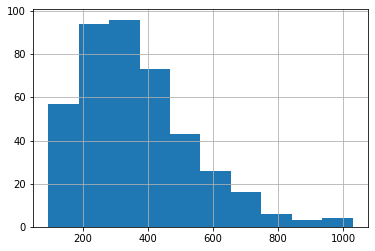

In [ ]:
#Number of characters present in each sentence
data1['Description'].str.len().hist();

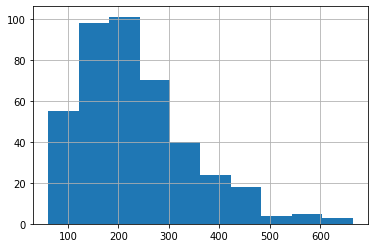

In [ ]:
data1['description_processed'].str.len().hist();

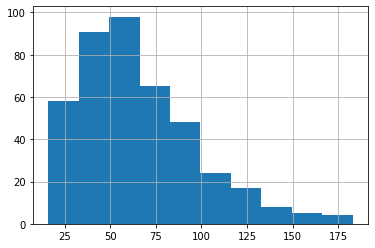

In [ ]:
#Number of words appearing in each description
data1['Description'].str.split().map(lambda x: len(x)).hist();

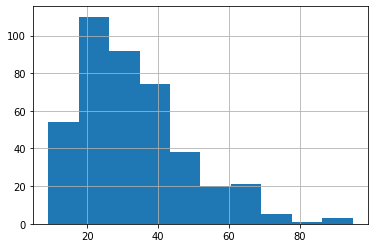

In [ ]:
data1['description_processed'].str.split().map(lambda x: len(x)).hist();

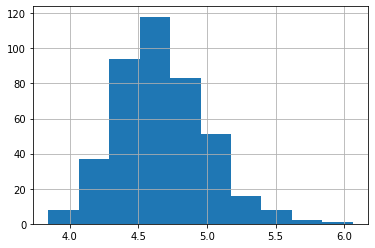

In [ ]:
#Average word length
import numpy as np
data1['Description'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist();

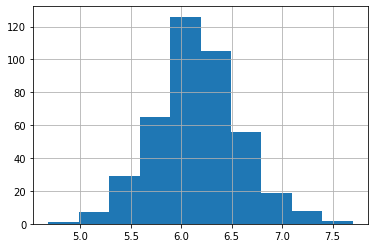

In [ ]:
data1['description_processed'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist();

In [ ]:
#N-gram analysis
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams= get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

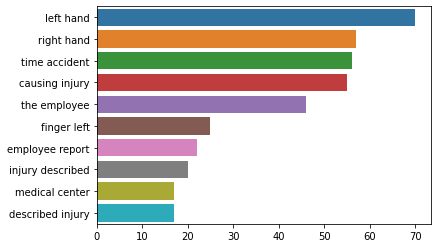

In [ ]:
#Bigram analysis
plot_top_ngrams_barchart(data1['description_processed'],2)

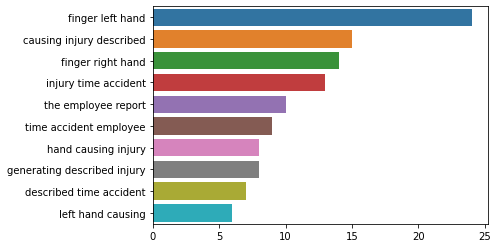

In [ ]:
#Trigram analysis
plot_top_ngrams_barchart(data1['description_processed'],3)

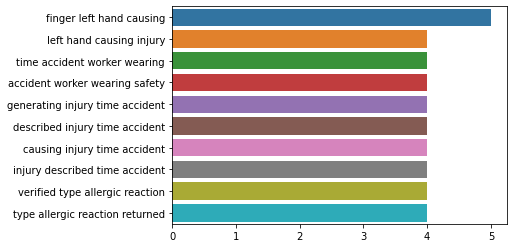

In [ ]:
#For n=4
plot_top_ngrams_barchart(data1['description_processed'],4)

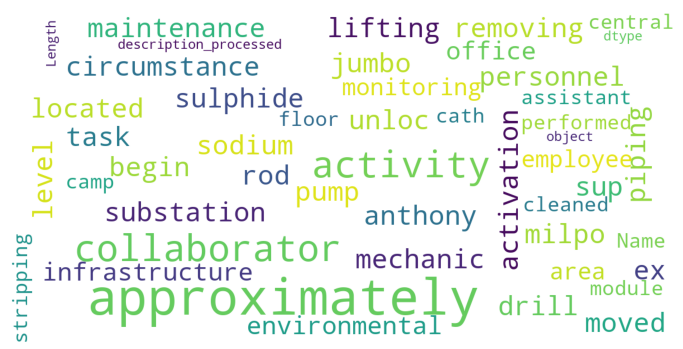

In [ ]:
#Wordcloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
desc = data1['description_processed']
wordcloud=wordcloud.generate(str(desc))

fig = plt.figure(1, figsize=(12, 12)) 
plt.axis('off')
 
plt.imshow(wordcloud)
plt.show()


In [ ]:
#Model building 
#Bag of words
#Target variable- accident level


In [ ]:
#Count vectorization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X = data1['description_processed']
y = data1['Accident Level']

count_vec = CountVectorizer(analyzer='word', ngram_range=(1, 2))
Xc = count_vec.fit_transform(X).toarray()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, y, test_size=0.15, random_state=42)

In [ ]:
Xc_train.shape

(355, 13242)

In [ ]:
Xc_test.shape

(63, 13242)

In [ ]:
#SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC

svc = LinearSVC( max_iter=2500)
svc.fit(Xc_train, yc_train)
yc_pred_SVC = svc.predict(Xc_test)

In [ ]:
acc_svc = accuracy_score(yc_test, yc_pred_SVC)
acc_svc_tr = svc.score(Xc_train, yc_train)
print("Train accuracy of the SVC model : {:.2f}".format(acc_svc_tr*100))
print("Test accuracy of the SVC model : {:.2f}".format(acc_svc*100))


Train accuracy of the SVC model : 99.44
Test accuracy of the SVC model : 76.19


In [ ]:
print('Classification report:',classification_report(yc_test, yc_pred_SVC))

Classification report:               precision    recall  f1-score   support

           I       0.80      0.98      0.88        48
          II       0.00      0.00      0.00         5
         III       0.50      0.25      0.33         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.26      0.25      0.24        63
weighted avg       0.64      0.76      0.69        63



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Confusion matrix:', confusion_matrix(yc_test,yc_pred_SVC))

Confusion matrix: [[47  1  0  0  0]
 [ 5  0  0  0  0]
 [ 3  0  1  0  0]
 [ 3  1  1  0  0]
 [ 1  0  0  0  0]]


In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(Xc_train, yc_train)
yc_pred_rfc = rfc.predict(Xc_test)

acc_rfc = accuracy_score(yc_test, yc_pred_rfc)
acc_rfc_tr = rfc.score(Xc_train,yc_train)

print("Train Accuracy of the Random Forest model : {:.2f}".format(acc_rfc_tr*100))
print("Test Accuracy of the Random Forest model : {:.2f}".format(acc_rfc*100))
print('Classification report:',classification_report(yc_test, yc_pred_rfc))
print('Confusion matrix:', confusion_matrix(yc_test,yc_pred_rfc))

Train Accuracy of the Random Forest model : 99.44
Test Accuracy of the Random Forest model : 76.19
Classification report:               precision    recall  f1-score   support

           I       0.76      1.00      0.86        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(Xc_train, yc_train)
yc_pred_gb = gbc.predict(Xc_test)
acc_gbc = accuracy_score(yc_test, yc_pred_gb)
acc_gbc_tr = gbc.score(Xc_train,yc_train)

print(" Test accuracy of the Gradient boosting model : {:.2f}".format(acc_gbc*100))
print("Train accuracy of the Gradient boosting model : {:.2f}".format(acc_gbc_tr*100))
print('Classification report:',classification_report(yc_test,yc_pred_gb ))

 Test accuracy of the Gradient boosting model : 71.43
Train accuracy of the Gradient boosting model : 99.44
Classification report:               precision    recall  f1-score   support

           I       0.79      0.94      0.86        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.71        63
   macro avg       0.16      0.19      0.17        63
weighted avg       0.60      0.71      0.65        63



In [ ]:
print('Confusion matrix:', confusion_matrix(yc_test,yc_pred_gb))

Confusion matrix: [[45  1  0  1  1]
 [ 5  0  0  0  0]
 [ 3  0  0  1  0]
 [ 3  0  2  0  0]
 [ 1  0  0  0  0]]


In [ ]:
#XGBOOST
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(Xc_train, yc_train)
yc_pred_xg = xgbc.predict(Xc_test)
acc_xgbc = accuracy_score(yc_test, yc_pred_xg)
acc_xgbc_tr = xgbc.score(Xc_train,yc_train)

print(" Test accuracy of the XGBoost model : {:.2f}".format(acc_xgbc*100))
print("Train accuracy of the XGBoost model : {:.2f}".format(acc_xgbc_tr*100))
print('Classification report:',classification_report(yc_test,yc_pred_xg))
print('Confusion matrix:', confusion_matrix(yc_test,yc_pred_xg))


 Test accuracy of the XGBoost model : 73.02
Train accuracy of the XGBoost model : 93.80
Classification report:               precision    recall  f1-score   support

           I       0.75      0.96      0.84        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.73        63
   macro avg       0.15      0.19      0.17        63
weighted avg       0.57      0.73      0.64        63

Confusion matrix: [[46  0  1  0  1]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(Xc_train, yc_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
yc_pred_k = neigh.predict(Xc_test)
acc_neigh = accuracy_score(yc_test, yc_pred_k)
acc_neigh_tr = neigh.score(Xc_train,yc_train)


In [ ]:
print(" Test accuracy of the KNeighbours model : {:.2f}".format(acc_neigh*100))
print("Train accuracy of the Kneighbours model : {:.2f}".format(acc_neigh_tr*100))
print('Classification report:',classification_report(yc_test,yc_pred_k))
print('Confusion matrix:', confusion_matrix(yc_test,yc_pred_k))


 Test accuracy of the KNeighbours model : 76.19
Train accuracy of the Kneighbours model : 74.08
Classification report:               precision    recall  f1-score   support

           I       0.77      1.00      0.87        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.59      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 4  1  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
g_model1 = GaussianNB()
g_model1.fit(Xc_train, yc_train)
g_pred1 = g_model1.predict(Xc_test)

#print('Accuracy on Training data:',g_model1.score(Xc_train, yc_train) ) #accuracy of training data
#print('Accuracy on Test data:',g_model1.score(Xc_test, yc_test) ) #accuracy data of testing data

In [ ]:
print('Accuracy on Training data:',g_model1.score(Xc_train, yc_train) ) #accuracy of training data
print('Accuracy on Test data:',g_model1.score(Xc_test, yc_test) ) #accuracy data of testing data

Accuracy on Training data: 0.9943661971830986
Accuracy on Test data: 0.746031746031746


In [ ]:
print('Classification report:',classification_report(yc_test,g_pred1))
print('Confusion matrix:', confusion_matrix(yc_test,g_pred1))

Classification report:               precision    recall  f1-score   support

           I       0.76      0.98      0.85        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.75        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.75      0.65        63

Confusion matrix: [[47  0  0  1  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators,
              
        }
grid = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(Xc_train, yc_train) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [ ]:
yc_pred_b = grid.predict(Xc_test)
acc_b = accuracy_score(yc_test, yc_pred_b)
acc_b_tr = grid.score(Xc_train,yc_train)

print(" Test accuracy of the Bagging model : {:.2f}".format(acc_b*100))
print("Train accuracy of the Bagging model : {:.2f}".format(acc_b_tr*100))
print('Classification report:',classification_report(yc_test,yc_pred_b))
print('Confusion matrix:', confusion_matrix(yc_test,yc_pred_b))

 Test accuracy of the Bagging model : 76.19
Train accuracy of the Bagging model : 99.15
Classification report:               precision    recall  f1-score   support

           I       0.77      1.00      0.87        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.59      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 4  0  1  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ada.fit(Xc_train, yc_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
yc_pred_ada = clf_ada.predict(Xc_test)
acc_ada = accuracy_score(yc_test, yc_pred_ada)
acc_ada_tr = clf_ada.score(Xc_train,yc_train)

print(" Test accuracy of the ADA model : {:.2f}".format(acc_ada*100))
print("Train accuracy of the ADA model : {:.2f}".format(acc_ada_tr*100))
print('Classification report:',classification_report(yc_test,yc_pred_ada))
print('Confusion matrix:', confusion_matrix(yc_test,yc_pred_ada))

 Test accuracy of the ADA model : 73.02
Train accuracy of the ADA model : 75.77
Classification report:               precision    recall  f1-score   support

           I       0.75      0.96      0.84        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.73        63
   macro avg       0.15      0.19      0.17        63
weighted avg       0.57      0.73      0.64        63

Confusion matrix: [[46  1  0  1  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Target variable- potential accident level


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X1 = data1['description_processed']
yp = data1['Potential Accident Level']

cnt_vecp = CountVectorizer(analyzer='word', ngram_range=(1, 2))
Xp = cnt_vecp.fit_transform(X1).toarray()
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.15, random_state=42)

In [ ]:
#Shape of training data
Xp_train.shape

(355, 13242)

In [ ]:
#Shape of testing data
Xp_test.shape

(63, 13242)

In [ ]:
#SVC
svc_1 = LinearSVC( max_iter=5500)
svc_1.fit(Xp_train, yp_train)
yp_predsvc_1 = svc_1.predict(Xp_test)

# Evaluation
accp_svc = accuracy_score(yp_test, yp_predsvc_1)
accp_svc_tr = svc_1.score(Xp_train,yp_train)

print("Test accuracy of the SVC model : {:.2f}".format(accp_svc*100))
print("Train accuracy of the SVC model : {:.2f}".format(accp_svc_tr*100))

Test accuracy of the SVC model : 44.44
Train accuracy of the SVC model : 99.72


In [ ]:
print('Classification report:',classification_report(yp_test, yp_predsvc_1))
print('Confusion matrix:', confusion_matrix(yp_test,yp_predsvc_1))

Classification report:               precision    recall  f1-score   support

           I       0.50      0.14      0.22         7
          II       0.46      0.55      0.50        11
         III       0.35      0.32      0.33        19
          IV       0.48      0.65      0.56        23
           V       0.00      0.00      0.00         3

    accuracy                           0.44        63
   macro avg       0.36      0.33      0.32        63
weighted avg       0.42      0.44      0.42        63

Confusion matrix: [[ 1  1  4  1  0]
 [ 0  6  2  3  0]
 [ 0  3  6 10  0]
 [ 1  3  4 15  0]
 [ 0  0  1  2  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Random Forest model Training and Evaluation
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(Xp_train, yp_train)
yp_pred_rf = rf1.predict(Xp_test)

#Evaluation
accp_rfc = accuracy_score(yp_test, yp_pred_rf)
accp_rfc_tr = rf1.score(Xp_train,yp_train)

print("Test accuracy of the Random Forest model : {:.2f}".format(accp_rfc*100))
print("Train accuracy of the Random Forest model : {:.2f}".format(accp_rfc_tr*100))

Test accuracy of the Random Forest model : 38.10
Train accuracy of the Random Forest model : 99.72


In [ ]:
print('Classification report:',classification_report(yp_test, yp_pred_rf))
print('Confusion matrix:', confusion_matrix(yp_test,yp_pred_rf))

Classification report:               precision    recall  f1-score   support

           I       0.50      0.14      0.22         7
          II       0.50      0.27      0.35        11
         III       0.45      0.26      0.33        19
          IV       0.34      0.65      0.45        23
           V       0.00      0.00      0.00         3

    accuracy                           0.38        63
   macro avg       0.36      0.27      0.27        63
weighted avg       0.40      0.38      0.35        63

Confusion matrix: [[ 1  0  0  6  0]
 [ 0  3  2  6  0]
 [ 0  0  5 14  0]
 [ 1  3  4 15  0]
 [ 0  0  0  3  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Gradient Boosting Model Building and Evaluation
gb_1 = GradientBoostingClassifier(n_estimators=100,)
gb_1.fit(Xp_train, yp_train)
yp_pred_gb1 = gb_1.predict(Xp_test)
accp_gbc = accuracy_score(yp_test, yp_pred_gb1)
accp_gbc_tr = gb_1.score(Xp_train,yp_train)

print("Test accuracy of the Gradient boosting model : {:.2f}".format(accp_gbc*100))
print("Train accuracy of the Gradient boosting model : {:.2f}".format(accp_gbc_tr*100))

Test accuracy of the Gradient boosting model : 38.10
Train accuracy of the Gradient boosting model : 99.72


In [ ]:
print('Classification report:',classification_report(yp_test,yp_pred_gb1 ))
print('Confusion matrix:', confusion_matrix(yp_test,yp_pred_gb1))

Classification report:               precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.60      0.27      0.37        11
         III       0.24      0.21      0.22        19
          IV       0.41      0.70      0.52        23
           V       0.00      0.00      0.00         3

    accuracy                           0.38        63
   macro avg       0.45      0.26      0.27        63
weighted avg       0.44      0.38      0.35        63

Confusion matrix: [[ 1  1  3  2  0]
 [ 0  3  3  4  1]
 [ 0  0  4 15  0]
 [ 0  1  6 16  0]
 [ 0  0  1  2  0]]


In [ ]:
#XGBoost Model for Training and Evaluation
xgb_1 = XGBClassifier()
xgb_1.fit(Xp_train, yp_train)
yp_pred_xgb = xgb_1.predict(Xp_test)
accp_xgbc = accuracy_score(yp_test, yp_pred_xgb)
accp_xgbc_tr = xgb_1.score(Xp_train,yp_train)

print("Test accuracy of the XGBoost model : {:.2f}".format(accp_xgbc*100))
print("Train accuracy of the XGBoost model : {:.2f}".format(accp_xgbc_tr*100))

Test accuracy of the XGBoost model : 31.75
Train accuracy of the XGBoost model : 90.99


In [ ]:
print('Classification report:',classification_report(yp_test,yp_pred_xgb))
print('Confusion matrix:', confusion_matrix(yp_test,yp_pred_xgb))

Classification report:               precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.22      0.18      0.20        11
         III       0.21      0.21      0.21        19
          IV       0.38      0.57      0.46        23
           V       0.00      0.00      0.00         3

    accuracy                           0.32        63
   macro avg       0.36      0.22      0.22        63
weighted avg       0.35      0.32      0.29        63

Confusion matrix: [[ 1  1  4  1  0]
 [ 0  2  3  6  0]
 [ 0  3  4 12  0]
 [ 0  3  7 13  0]
 [ 0  0  1  2  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Kneighbours
from sklearn.neighbors import KNeighborsClassifier
neigh_1 = KNeighborsClassifier(n_neighbors=3)
neigh_1.fit(Xp_train, yp_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
yp_pred_k1 = neigh_1.predict(Xp_test)
acc_neigh1 = accuracy_score(yp_test, yp_pred_k1)
acc_neigh_tr1 = neigh_1.score(Xp_train,yp_train)


In [ ]:
print(" Test accuracy of the KNeighbours model : {:.2f}".format(acc_neigh1*100))
print("Train accuracy of the Kneighbours model : {:.2f}".format(acc_neigh_tr1*100))
print('Classification report:',classification_report(yp_test,yp_pred_k1))
print('Confusion matrix:', confusion_matrix(yp_test,yp_pred_k1))

 Test accuracy of the KNeighbours model : 25.40
Train accuracy of the Kneighbours model : 54.65
Classification report:               precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.18      0.45      0.26        11
         III       0.31      0.53      0.39        19
          IV       0.00      0.00      0.00        23
           V       0.00      0.00      0.00         3

    accuracy                           0.25        63
   macro avg       0.30      0.22      0.18        63
weighted avg       0.24      0.25      0.19        63

Confusion matrix: [[ 1  3  3  0  0]
 [ 0  5  5  1  0]
 [ 0  9 10  0  0]
 [ 0  9 14  0  0]
 [ 0  2  0  1  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
g_model2 = GaussianNB()
g_model2.fit(Xp_train, yp_train)
g_pred2 = g_model2.predict(Xp_test)

In [ ]:
print('Accuracy on Training data:',g_model2.score(Xp_train, yp_train) ) #accuracy of training data
print('Accuracy on Test data:',g_model2.score(Xp_test, yp_test) ) #accuracy data of testing data

Accuracy on Training data: 0.9971830985915493
Accuracy on Test data: 0.42857142857142855


In [ ]:
print('Classification report:',classification_report(yp_test,g_pred2))
print('Confusion matrix:', confusion_matrix(yp_test,g_pred2))

Classification report:               precision    recall  f1-score   support

           I       0.25      0.14      0.18         7
          II       0.44      0.36      0.40        11
         III       0.40      0.32      0.35        19
          IV       0.46      0.70      0.55        23
           V       0.00      0.00      0.00         3

    accuracy                           0.43        63
   macro avg       0.31      0.30      0.30        63
weighted avg       0.39      0.43      0.40        63

Confusion matrix: [[ 1  3  2  1  0]
 [ 1  4  1  5  0]
 [ 0  1  6 12  0]
 [ 2  0  5 16  0]
 [ 0  1  1  1  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
n_estimators1 = [10,30,50,70,80,150,160, 170,175,180,185];
cv1 = ShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters1 = {'n_estimators':n_estimators1,
              
        }
grid1 = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters1,
                                 cv=cv1,
                                 n_jobs = -1)


In [ ]:
grid1.fit(Xp_train, yp_train) 

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=15, test_size=0.3, train_size=None),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [ ]:
yp_pred_b1 = grid1.predict(Xp_test)
acc_b1 = accuracy_score(yp_test, yp_pred_b1)
acc_b1_tr = grid1.score(Xp_train,yp_train)

print(" Test accuracy of the Bagging model : {:.2f}".format(acc_b1*100))
print("Train accuracy of the Bagging model : {:.2f}".format(acc_b1_tr*100))
print('Classification report:',classification_report(yp_test,yp_pred_b1))
print('Confusion matrix:', confusion_matrix(yp_test,yp_pred_b1))

 Test accuracy of the Bagging model : 36.51
Train accuracy of the Bagging model : 99.72
Classification report:               precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.27      0.27      0.27        11
         III       0.36      0.26      0.30        19
          IV       0.38      0.61      0.47        23
           V       0.00      0.00      0.00         3

    accuracy                           0.37        63
   macro avg       0.40      0.26      0.26        63
weighted avg       0.40      0.37      0.34        63

Confusion matrix: [[ 1  1  3  2  0]
 [ 0  3  2  6  0]
 [ 0  2  5 12  0]
 [ 0  5  4 14  0]
 [ 0  0  0  3  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#ADA boosting
from sklearn.ensemble import AdaBoostClassifier
clf_ada1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ada1.fit(Xp_train, yp_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
yp_pred_ada1 = clf_ada1.predict(Xp_test)
acc_ada1 = accuracy_score(yp_test, yp_pred_ada1)
acc_ada1_tr = clf_ada1.score(Xp_train,yp_train)

print(" Test accuracy of the ADA model : {:.2f}".format(acc_ada1*100))
print("Train accuracy of the ADA model : {:.2f}".format(acc_ada1_tr*100))
print('Classification report:',classification_report(yp_test,yp_pred_ada1))
print('Confusion matrix:', confusion_matrix(yp_test,yp_pred_ada1))

 Test accuracy of the ADA model : 36.51
Train accuracy of the ADA model : 43.38
Classification report:               precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.25      0.18      0.21        11
         III       0.00      0.00      0.00        19
          IV       0.39      0.78      0.52        23
           V       0.29      0.67      0.40         3

    accuracy                           0.37        63
   macro avg       0.39      0.35      0.28        63
weighted avg       0.31      0.37      0.27        63

Confusion matrix: [[ 1  0  1  5  0]
 [ 0  2  0  8  1]
 [ 0  4  0 14  1]
 [ 0  2  0 18  3]
 [ 0  0  0  1  2]]


In [ ]:
#TF-IDF
#Target variable- accident level


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(ngram_range=(1,2))
Xt = tfidf_vec.fit_transform(X).toarray()

Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, y, test_size=0.15, random_state=42)

In [ ]:
#SVC Model Training and Evaluation
svctf = LinearSVC(max_iter=5500)
svctf.fit(Xt_train, yt_train)
yt_pred_tf = svctf.predict(Xt_test)

# Evaluation
acct_svctf = accuracy_score(yt_test, yt_pred_tf)
acct_svctf_tr = svctf.score(Xt_train,yt_train)

print("Test accuracy of the SVC model : {:.2f}".format(acct_svctf*100))
print("Train accuracy of the SVC model : {:.2f}".format(acct_svctf_tr*100))

Test accuracy of the SVC model : 76.19
Train accuracy of the SVC model : 99.15


In [ ]:
print('Classification report:',classification_report(yt_test,yt_pred_tf))
print('Confusion matrix:', confusion_matrix(yt_test,yt_pred_tf))

Classification report:               precision    recall  f1-score   support

           I       0.76      1.00      0.86        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Random Forest model Training and Evaluation
rfc_tf = RandomForestClassifier(random_state=42)
rfc_tf.fit(Xt_train, yt_train)
yt_pred_rftf = rfc_tf.predict(Xt_test)

acct_rfc_tf = accuracy_score(yt_test, yt_pred_rftf)
acct_rfc_tf_tr = rfc_tf.score(Xt_train,yt_train)

print("Test accuracy of the Random Forest model : {:.2f}".format(acct_rfc_tf*100))
print("Train accuracy of the Random Forest model : {:.2f}".format(acct_rfc_tf_tr*100))

Test accuracy of the Random Forest model : 76.19
Train accuracy of the Random Forest model : 99.44


In [ ]:
print('Classification report:',classification_report(yt_test,yt_pred_rftf))
print('Confusion matrix:', confusion_matrix(yt_test,yt_pred_rftf))

Classification report:               precision    recall  f1-score   support

           I       0.76      1.00      0.86        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Gradient Boosting Model Building and Evaluation
from sklearn.ensemble import GradientBoostingClassifier
gb_tf = GradientBoostingClassifier(n_estimators=100)
gb_tf.fit(Xt_train, yt_train)
yt_pred_gbtf = gb_tf.predict(Xt_test)
acct_gb_tf = accuracy_score(yt_test,yt_pred_gbtf )
acct_gb_tf_tr = gb_tf.score(Xt_train,yt_train)

print("Train accuracy of the Gradient boosting model : {:.2f}".format(acct_gb_tf*100))
print("Test accuracy of the Gradient boosting model : {:.2f}".format(acct_gb_tf_tr*100))
print('Classification report:',classification_report(yt_test,yt_pred_gbtf ))

Train accuracy of the Gradient boosting model : 68.25
Test accuracy of the Gradient boosting model : 99.44
Classification report:               precision    recall  f1-score   support

           I       0.77      0.90      0.83        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.68        63
   macro avg       0.15      0.18      0.17        63
weighted avg       0.59      0.68      0.63        63



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Confusion matrix:', confusion_matrix(yt_test,yt_pred_gbtf))

Confusion matrix: [[43  1  3  1  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 3  0  2  0  0]
 [ 1  0  0  0  0]]


In [ ]:
#XGBoost Model for Training and Evaluation
xgb_tf = XGBClassifier()
xgb_tf.fit(Xt_train, yt_train)
yt_predxgb_tf = xgb_tf.predict(Xt_test)
acct_xgb_tf = accuracy_score(yt_test, yt_predxgb_tf)
acct_xgb_tf_tr = xgb_tf.score(Xt_train,yt_train)

print(" Test accuracy of the XGBoost model : {:.2f}".format(acct_xgb_tf*100))
print("Train accuracy of the XGBoost model : {:.2f}".format(acct_xgb_tf_tr*100))

 Test accuracy of the XGBoost model : 76.19
Train accuracy of the XGBoost model : 96.62


In [ ]:
print('Classification report:',classification_report(yt_test,yt_predxgb_tf ))
print('Confusion matrix:', confusion_matrix(yt_test,yt_predxgb_tf))

Classification report:               precision    recall  f1-score   support

           I       0.76      1.00      0.86        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.76        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.76      0.66        63

Confusion matrix: [[48  0  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Kneighbours
from sklearn.neighbors import KNeighborsClassifier
neigh_2 = KNeighborsClassifier(n_neighbors=3)
neigh_2.fit(Xt_train, yt_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
yt_pred_k2 = neigh_2.predict(Xt_test)
acc_neigh2 = accuracy_score(yt_test, yt_pred_k2)
acc_neigh_tr2 = neigh_2.score(Xt_train,yt_train)


In [ ]:
print(" Test accuracy of the KNeighbours model : {:.2f}".format(acc_neigh2*100))
print("Train accuracy of the Kneighbours model : {:.2f}".format(acc_neigh_tr2*100))
print('Classification report:',classification_report(yt_test,yt_pred_k2))
print('Confusion matrix:', confusion_matrix(yt_test,yt_pred_k2))

 Test accuracy of the KNeighbours model : 74.60
Train accuracy of the Kneighbours model : 77.18
Classification report:               precision    recall  f1-score   support

           I       0.77      0.98      0.86        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.75        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.59      0.75      0.66        63

Confusion matrix: [[47  1  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 4  1  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
g_model3 = GaussianNB()
g_model3.fit(Xt_train, yt_train)
g_pred3 = g_model3.predict(Xt_test)

In [ ]:
print('Accuracy on Training data:',g_model3.score(Xt_train, yt_train) ) #accuracy of training data
print('Accuracy on Test data:',g_model3.score(Xt_test, yt_test) ) #accuracy data of testing data

Accuracy on Training data: 0.9943661971830986
Accuracy on Test data: 0.746031746031746


In [ ]:
print('Classification report:',classification_report(yt_test,g_pred3))
print('Confusion matrix:', confusion_matrix(yt_test,g_pred3))

Classification report:               precision    recall  f1-score   support

           I       0.76      0.98      0.85        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.75        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.75      0.65        63

Confusion matrix: [[47  0  0  1  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
n_estimators3 = [10,30,50,70,80,150,160, 170,175,180,185];
cv3 = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters3 = {'n_estimators':n_estimators3,
              
        }
grid3 = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters3,
                                 cv=cv3,
                                 n_jobs = -1)
grid3.fit(Xt_train, yt_train) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [ ]:
yt_pred_b3 = grid3.predict(Xt_test)
acc_b3 = accuracy_score(yt_test, yt_pred_b3)
acc_b3_tr = grid3.score(Xt_train,yt_train)

print(" Test accuracy of the Bagging model : {:.2f}".format(acc_b3*100))
print("Train accuracy of the Bagging model : {:.2f}".format(acc_b3_tr*100))
print('Classification report:',classification_report(yt_test,yt_pred_b3))
print('Confusion matrix:', confusion_matrix(yt_test,yt_pred_b3))

 Test accuracy of the Bagging model : 74.60
Train accuracy of the Bagging model : 99.15
Classification report:               precision    recall  f1-score   support

           I       0.76      0.98      0.85        48
          II       0.00      0.00      0.00         5
         III       0.00      0.00      0.00         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.75        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.58      0.75      0.65        63

Confusion matrix: [[47  1  0  0  0]
 [ 5  0  0  0  0]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
clf_ada_t = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ada_t.fit(Xt_train, yt_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
yt_pred_ada_1 = clf_ada_t.predict(Xt_test)
acc_ada_t1 = accuracy_score(yt_test, yt_pred_ada_1)
acc_ada_t1_tr = clf_ada_t.score(Xt_train,yt_train)

print(" Test accuracy of the ADA model : {:.2f}".format(acc_ada_t1*100))
print("Train accuracy of the ADA model : {:.2f}".format(acc_ada_t1_tr*100))
print('Classification report:',classification_report(yt_test,yt_pred_ada_1))
print('Confusion matrix:', confusion_matrix(yt_test,yt_pred_ada_1))

 Test accuracy of the ADA model : 71.43
Train accuracy of the ADA model : 74.08
Classification report:               precision    recall  f1-score   support

           I       0.79      0.92      0.85        48
          II       0.00      0.00      0.00         5
         III       0.33      0.25      0.29         4
          IV       0.00      0.00      0.00         5
           V       0.00      0.00      0.00         1

    accuracy                           0.71        63
   macro avg       0.22      0.23      0.23        63
weighted avg       0.62      0.71      0.66        63

Confusion matrix: [[44  3  0  1  0]
 [ 3  0  2  0  0]
 [ 3  0  1  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Target variable- potential accident level
tfidf_vecp = TfidfVectorizer(ngram_range=(1,2))
Xpa = tfidf_vecp.fit_transform(X).toarray()

Xpa_train, Xpa_test, ypa_train, ypa_test = train_test_split(Xpa, yp, test_size=0.15, random_state=42)

In [ ]:
#SVC Model Training and Evaluation
svc_pa = LinearSVC(max_iter=5500)
svc_pa.fit(Xpa_train, ypa_train)
ypa_pred_pa = svc_pa.predict(Xpa_test)

# Evaluation
accpa_svc = accuracy_score(ypa_test,ypa_pred_pa  )
accpa_svc_pa_tr = svc_pa.score(Xpa_train,ypa_train)

print("Test accuracy of the SVC model : {:.2f}".format(accpa_svc*100))
print("Train accuracy of the SVC model : {:.2f}".format(accpa_svc_pa_tr*100))

Test accuracy of the SVC model : 42.86
Train accuracy of the SVC model : 99.72


In [ ]:
print('Classification report:',classification_report(ypa_test,ypa_pred_pa))
print('Confusion matrix:', confusion_matrix(ypa_test,ypa_pred_pa))

Classification report:               precision    recall  f1-score   support

           I       0.50      0.14      0.22         7
          II       0.56      0.45      0.50        11
         III       0.43      0.16      0.23        19
          IV       0.40      0.78      0.53        23
           V       0.00      0.00      0.00         3

    accuracy                           0.43        63
   macro avg       0.38      0.31      0.30        63
weighted avg       0.43      0.43      0.37        63

Confusion matrix: [[ 1  1  2  3  0]
 [ 0  5  1  5  0]
 [ 0  0  3 16  0]
 [ 1  3  1 18  0]
 [ 0  0  0  3  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Random forest
rf_pa = RandomForestClassifier(random_state=42)
rf_pa.fit(Xpa_train, ypa_train)
ypa_pred_rf = rf_pa.predict(Xpa_test)

acc_pa_rf = accuracy_score(ypa_test, ypa_pred_rf)
acc_pa_rf_tr = rf_pa.score(Xpa_train, ypa_train)

print("Test accuracy of the Random Forest model : {:.2f}".format(acc_pa_rf*100))
print("Train accuracy of the Random Forest model : {:.2f}".format(acc_pa_rf_tr*100))
print('Classification report:',classification_report(ypa_test,ypa_pred_rf))
print('Confusion matrix:', confusion_matrix(ypa_test,ypa_pred_rf))

Test accuracy of the Random Forest model : 41.27
Train accuracy of the Random Forest model : 99.72
Classification report:               precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.75      0.27      0.40        11
         III       0.36      0.21      0.27        19
          IV       0.38      0.78      0.51        23
           V       0.00      0.00      0.00         3

    accuracy                           0.41        63
   macro avg       0.50      0.28      0.29        63
weighted avg       0.49      0.41      0.37        63

Confusion matrix: [[ 1  0  1  5  0]
 [ 0  3  2  6  0]
 [ 0  0  4 15  0]
 [ 0  1  4 18  0]
 [ 0  0  0  3  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Gradient boosting
gb_pa = GradientBoostingClassifier(n_estimators=100)
gb_pa.fit(Xpa_train, ypa_train)
ypa_pred_gb = gb_pa.predict(Xpa_test)
acc_pa_gb = accuracy_score(ypa_test,ypa_pred_gb )
acc_pa_gb_tr = gb_pa.score(Xpa_train, ypa_train)

print("Test accuracy of the Gradient boosting model : {:.2f}".format(acc_pa_gb*100))
print("Train accuracy of the Gradient boosting model : {:.2f}".format(acc_pa_gb_tr*100))
print('Classification report:',classification_report(ypa_test,ypa_pred_gb))
print('Confusion matrix:', confusion_matrix(ypa_test,ypa_pred_gb))

Test accuracy of the Gradient boosting model : 41.27
Train accuracy of the Gradient boosting model : 99.72
Classification report:               precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.00      0.00      0.00        11
         III       0.36      0.42      0.39        19
          IV       0.47      0.74      0.58        23
           V       0.00      0.00      0.00         3

    accuracy                           0.41        63
   macro avg       0.37      0.26      0.24        63
weighted avg       0.39      0.41      0.36        63

Confusion matrix: [[ 1  1  3  2  0]
 [ 0  0  5  5  1]
 [ 0  2  8  9  0]
 [ 0  0  6 17  0]
 [ 0  0  0  3  0]]


In [ ]:
#XGBoost Model for Training and Evaluation
xgb_pa = XGBClassifier()
xgb_pa.fit(Xpa_train, ypa_train)
ypa_pred_pa = xgb_pa.predict(Xpa_test)
acc_pa_xgb = accuracy_score(ypa_test,ypa_pred_pa )
acc_pa_xgb_tr = xgb_pa.score(Xpa_train,ypa_train)

print(" Test accuracy of the XGBoost model : {:.2f}".format(acc_pa_xgb*100))
print("Train accuracy of the XGBoost model : {:.2f}".format(acc_pa_xgb_tr*100))
print('Classification report:',classification_report(ypa_test,ypa_pred_pa))
print('Confusion matrix:', confusion_matrix(ypa_test,ypa_pred_pa))

 Test accuracy of the XGBoost model : 42.86
Train accuracy of the XGBoost model : 97.18
Classification report:               precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.30      0.27      0.29        11
         III       0.39      0.37      0.38        19
          IV       0.48      0.70      0.57        23
           V       0.00      0.00      0.00         3

    accuracy                           0.43        63
   macro avg       0.43      0.30      0.30        63
weighted avg       0.46      0.43      0.40        63

Confusion matrix: [[ 1  1  3  2  0]
 [ 0  3  4  4  0]
 [ 0  3  7  8  1]
 [ 0  3  4 16  0]
 [ 0  0  0  3  0]]


In [ ]:
#Kneighbours
from sklearn.neighbors import KNeighborsClassifier
neigh_4 = KNeighborsClassifier(n_neighbors=3)
neigh_4.fit(Xpa_train, ypa_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
ypa_pred_k1 = neigh_4.predict(Xpa_test)
acc_pa_neigh1 = accuracy_score(ypa_test, ypa_pred_k1)
acc_pa_neigh_tr1 = neigh_4.score(Xpa_train,ypa_train)


In [ ]:
print(" Test accuracy of the KNeighbours model : {:.2f}".format(acc_pa_neigh1*100))
print("Train accuracy of the Kneighbours model : {:.2f}".format(acc_pa_neigh_tr1*100))
print('Classification report:',classification_report(ypa_test,ypa_pred_k1))
print('Confusion matrix:', confusion_matrix(ypa_test,ypa_pred_k1))

 Test accuracy of the KNeighbours model : 39.68
Train accuracy of the Kneighbours model : 63.94
Classification report:               precision    recall  f1-score   support

           I       0.11      0.14      0.12         7
          II       0.39      0.64      0.48        11
         III       0.40      0.21      0.28        19
          IV       0.50      0.57      0.53        23
           V       0.00      0.00      0.00         3

    accuracy                           0.40        63
   macro avg       0.28      0.31      0.28        63
weighted avg       0.38      0.40      0.38        63

Confusion matrix: [[ 1  4  1  1  0]
 [ 1  7  1  2  0]
 [ 4  3  4  8  0]
 [ 3  3  4 13  0]
 [ 0  1  0  2  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
g_model_pa = GaussianNB()
g_model_pa.fit(Xpa_train, ypa_train)
g_pred_pa = g_model_pa.predict(Xpa_test)

In [ ]:
print('Accuracy on Training data:',g_model_pa.score(Xpa_train, ypa_train) ) #accuracy of training data
print('Accuracy on Test data:',g_model_pa.score(Xpa_test, ypa_test) ) #accuracy data of testing data

Accuracy on Training data: 0.9971830985915493
Accuracy on Test data: 0.4444444444444444


In [ ]:
print('Classification report:',classification_report(ypa_test,g_pred_pa))
print('Confusion matrix:', confusion_matrix(ypa_test,g_pred_pa))

Classification report:               precision    recall  f1-score   support

           I       0.25      0.14      0.18         7
          II       0.50      0.36      0.42        11
         III       0.42      0.26      0.32        19
          IV       0.47      0.78      0.59        23
           V       0.00      0.00      0.00         3

    accuracy                           0.44        63
   macro avg       0.33      0.31      0.30        63
weighted avg       0.41      0.44      0.41        63

Confusion matrix: [[ 1  2  2  1  1]
 [ 1  4  1  5  0]
 [ 0  1  5 13  0]
 [ 2  0  3 18  0]
 [ 0  1  1  1  0]]


In [ ]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
n_estimators_pa = [10,30,50,70,80,150,160, 170,175,180,185];
cvpa = ShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters_pa = {'n_estimators':n_estimators_pa,
              
        }
grid_pa = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters_pa,
                                 cv=cvpa,
                                 n_jobs = -1)


In [ ]:
grid_pa.fit(Xpa_train, ypa_train) 

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=15, test_size=0.3, train_size=None),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [ ]:
ypa_pred_b1 = grid_pa.predict(Xpa_test)
acc_pa_b1 = accuracy_score(ypa_test, ypa_pred_b1)
acc_pa_b1_tr = grid_pa.score(Xpa_train,ypa_train)

print(" Test accuracy of the Bagging model : {:.2f}".format(acc_pa_b1*100))
print("Train accuracy of the Bagging model : {:.2f}".format(acc_pa_b1_tr*100))
print('Classification report:',classification_report(ypa_test,ypa_pred_b1))
print('Confusion matrix:', confusion_matrix(ypa_test,ypa_pred_b1))

 Test accuracy of the Bagging model : 47.62
Train accuracy of the Bagging model : 99.72
Classification report:               precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.57      0.36      0.44        11
         III       0.43      0.32      0.36        19
          IV       0.46      0.83      0.59        23
           V       0.00      0.00      0.00         3

    accuracy                           0.48        63
   macro avg       0.49      0.33      0.33        63
weighted avg       0.51      0.48      0.43        63

Confusion matrix: [[ 1  0  2  4  0]
 [ 0  4  3  4  0]
 [ 0  2  6 11  0]
 [ 0  1  3 19  0]
 [ 0  0  0  3  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#ADA boosting
from sklearn.ensemble import AdaBoostClassifier
clf_pa_ada1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_pa_ada1.fit(Xpa_train, ypa_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
ypa_pred_ada1 = clf_pa_ada1.predict(Xpa_test)
acc_pa_ada1 = accuracy_score(ypa_test, ypa_pred_ada1)
acc_pa_ada1_tr = clf_pa_ada1.score(Xpa_train,ypa_train)

print(" Test accuracy of the ADA model : {:.2f}".format(acc_pa_ada1*100))
print("Train accuracy of the ADA model : {:.2f}".format(acc_pa_ada1_tr*100))
print('Classification report:',classification_report(ypa_test,ypa_pred_ada1))
print('Confusion matrix:', confusion_matrix(ypa_test,ypa_pred_ada1))

 Test accuracy of the ADA model : 28.57
Train accuracy of the ADA model : 43.38
Classification report:               precision    recall  f1-score   support

           I       1.00      0.14      0.25         7
          II       0.25      0.09      0.13        11
         III       0.00      0.00      0.00        19
          IV       0.32      0.70      0.44        23
           V       0.00      0.00      0.00         3

    accuracy                           0.29        63
   macro avg       0.31      0.19      0.16        63
weighted avg       0.27      0.29      0.21        63

Confusion matrix: [[ 1  0  1  5  0]
 [ 0  1  0  9  1]
 [ 0  1  0 17  1]
 [ 0  2  3 16  2]
 [ 0  0  0  3  0]]


In [ ]:
#Comparing all machine learning models
#Machine learning models with target variable as accident level and count vectorization
models_list_accidentlevel = ["SVC using CountVectorizer","Random forest using count vectorization","Gradient Boosting using count vectorization","Xgboost model using count vectorization","Kneighbours using count vectorization","Naive bayes using count vectorization", "Bagging using count vectorization","ADA boosting using countvectorization"]

accuracy_accidentlevel = [acc_svc,acc_rfc,acc_gbc,acc_xgbc,acc_neigh,g_model1.score(Xc_test, yc_test),acc_b,acc_ada]
print(accuracy_accidentlevel)

[0.7619047619047619, 0.7619047619047619, 0.7142857142857143, 0.7301587301587301, 0.7619047619047619, 0.746031746031746, 0.7619047619047619, 0.7301587301587301]


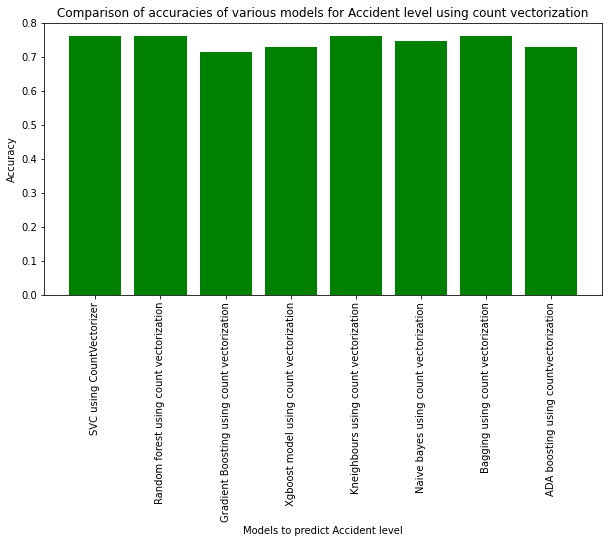

In [ ]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5)) 
plt.bar(models_list_accidentlevel, accuracy_accidentlevel, color ='green',width=0.8,) 
  
plt.xlabel("Models to predict Accident level") 
plt.xticks(rotation = 'vertical')
plt.ylabel("Accuracy") 
plt.title("Comparison of accuracies of various models for Accident level using count vectorization") 
plt.show() 

In [ ]:
models_list_accidentlevel_tf = ["SVC using TF-IDF","Random forest using TF-IDF","Gradient Boosting using TF-IDF","Xgboost model using TF-IDF","Kneighbours using TF-IDF","Naive bayes using TF-IDF", "Bagging using TF-IDF","ADA boosting using TF-IDF"]

accuracy_accidentlevel_tf = [acct_svctf,acct_rfc_tf,acct_gb_tf,acct_xgb_tf,acc_neigh2,g_model3.score(Xt_test, yt_test),acc_b3,acc_ada_t1
]
print(accuracy_accidentlevel_tf)

[0.7619047619047619, 0.7619047619047619, 0.6825396825396826, 0.7619047619047619, 0.746031746031746, 0.746031746031746, 0.746031746031746, 0.7142857142857143]


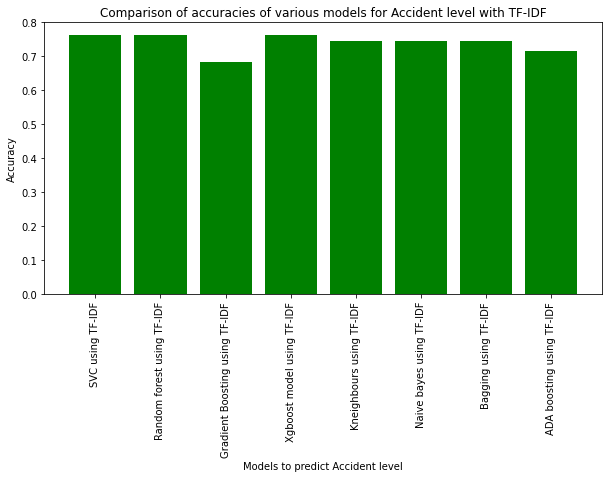

In [ ]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5)) 
plt.bar(models_list_accidentlevel_tf, accuracy_accidentlevel_tf, color ='green',width=0.8,) 
  
plt.xlabel("Models to predict Accident level") 
plt.xticks(rotation = 'vertical')
plt.ylabel("Accuracy") 
plt.title("Comparison of accuracies of various models for Accident level with TF-IDF") 
plt.show() 

In [ ]:
#Comparing machine learning models with target variable as potential accidentlevel.
#comparing count vectorization models
models_list_potentialaccidentlevel = ["SVC using CountVectorizer","Random forest using count vectorization","Gradient Boosting using count vectorization","Xgboost model using count vectorization","Kneighbours using count vectorization","Naive bayes using count vectorization", "Bagging using count vectorization","ADA boosting using countvectorization"]

accuracy_paccidentlevel = [accp_svc,accp_rfc,accp_gbc,accp_xgbc,acc_neigh1,g_model2.score(Xp_test, yp_test),acc_b1,acc_ada1]
print(accuracy_paccidentlevel)

[0.4444444444444444, 0.38095238095238093, 0.38095238095238093, 0.31746031746031744, 0.25396825396825395, 0.42857142857142855, 0.36507936507936506, 0.36507936507936506]


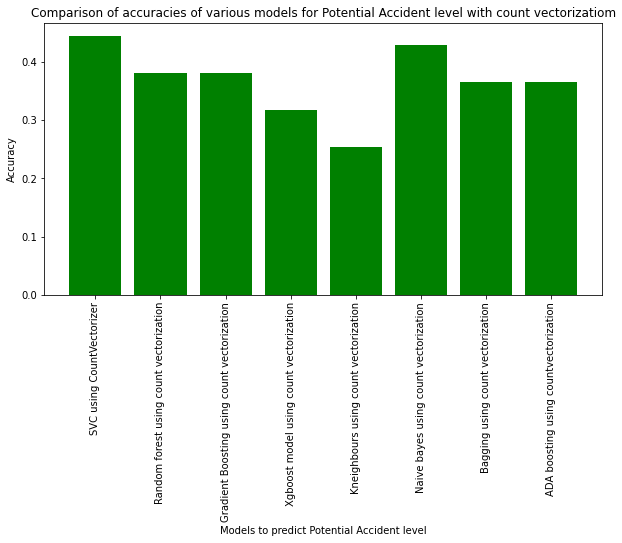

In [ ]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5)) 
plt.bar(models_list_potentialaccidentlevel, accuracy_paccidentlevel, color ='green',width=0.8,) 
  
plt.xlabel("Models to predict Potential Accident level") 
plt.xticks(rotation = 'vertical')
plt.ylabel("Accuracy") 
plt.title("Comparison of accuracies of various models for Potential Accident level with count vectorizatiom") 
plt.show() 

In [ ]:
#comparing machine learning models with TF-IDF for the target variable potential accident level.
models_list_paccidentlevel_tf = ["SVC using TF-IDF","Random forest using TF-IDF","Gradient Boosting using TF-IDF","Xgboost model using TF-IDF","Kneighbours using TF-IDF","Naive bayes using TF-IDF", "Bagging using TF-IDF","ADA boosting using TF-IDF"]

accuracy_paccidentlevel_tf = [accpa_svc,acc_pa_rf,acc_pa_gb,acc_pa_xgb,acc_pa_neigh1,g_model_pa.score(Xpa_test, ypa_test),acc_pa_b1,acc_pa_ada1]
print(accuracy_paccidentlevel_tf)

[0.42857142857142855, 0.4126984126984127, 0.4126984126984127, 0.42857142857142855, 0.3968253968253968, 0.4444444444444444, 0.47619047619047616, 0.2857142857142857]


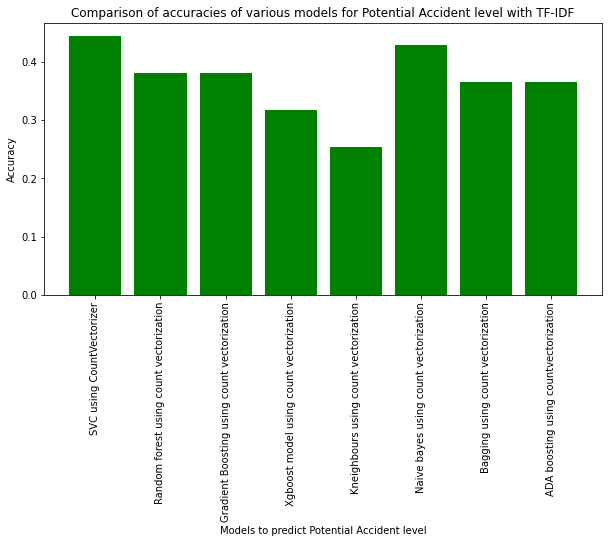

In [ ]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5)) 
plt.bar(models_list_potentialaccidentlevel, accuracy_paccidentlevel, color ='green',width=0.8,) 
  
plt.xlabel("Models to predict Potential Accident level") 
plt.xticks(rotation = 'vertical')
plt.ylabel("Accuracy") 
plt.title("Comparison of accuracies of various models for Potential Accident level with TF-IDF") 
plt.show()

In [ ]:
df3=data1.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
acident_level_encoder1 = LabelEncoder()
df3['Accident Level'] = acident_level_encoder1.fit_transform(df3['Accident Level'])

potentital_accident_level_encoder1 = LabelEncoder()
df3['Potential Accident Level'] = potentital_accident_level_encoder1.fit_transform(df3['Potential Accident Level'])

In [ ]:
y_p=df3['Accident Level']

In [ ]:
df3

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Natureofemployee,Critical Risk,Description,Year,Month,Weekday,Season,processed_text,description_processed
0,2016-01-01,Country_01,1,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday,Summer,"[while, removing, drill, rod, jumbo, maintenan...",while removing drill rod jumbo maintenance sup...
1,2016-01-02,Country_02,2,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,Saturday,Summer,"[during, activation, sodium, sulphide, pump, p...",during activation sodium sulphide pump piping ...
2,2016-01-06,Country_01,3,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,Wednesday,Summer,"[substation, milpo, located, level, collaborat...",substation milpo located level collaborator ex...
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,Friday,Summer,"[being, approximately, personnel, begin, task,...",being approximately personnel begin task unloc...
4,2016-01-10,Country_01,4,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,Sunday,Summer,"[approximately, am, circumstance, mechanic, an...",approximately am circumstance mechanic anthony...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2017-07-04,Country_01,4,Mining,0,2,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",2017,7,Tuesday,Winter,"[being, approximately, am, approximately, lift...",being approximately am approximately lifting k...
414,2017-07-04,Country_01,3,Mining,0,1,Female,Employee,Others,The collaborator moved from the infrastructure...,2017,7,Tuesday,Winter,"[the, collaborator, moved, infrastructure, off...",the collaborator moved infrastructure office j...
415,2017-07-05,Country_02,9,Metals,0,1,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,2017,7,Wednesday,Winter,"[during, environmental, monitoring, activity, ...",during environmental monitoring activity area ...
416,2017-07-06,Country_02,5,Metals,0,1,Male,Employee,Cut,The Employee performed the activity of strippi...,2017,7,Thursday,Winter,"[the, employee, performed, activity, stripping...",the employee performed activity stripping cath...


In [ ]:
x_p=df3['description_processed']


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(ngram_range=(1,2))
Xte = tfidf_vec.fit_transform(x_p).toarray()

In [ ]:
#splitting training and testing data
from sklearn.model_selection import train_test_split
X_trainp, X_testp, y_trainp, y_testp = train_test_split(Xte, y_p, test_size=0.3, random_state=50)

In [ ]:
random_seed = 2
X_testp, X_valp, y_testp, y_valp = train_test_split(X_testp,y_testp, test_size = 0.5, random_state=random_seed)

In [ ]:
#shape of train and test
print("Shape of training and testing:",X_trainp.shape,X_testp.shape)

Shape of training and testing: (292, 13242) (63, 13242)


In [ ]:
from tensorflow.python.keras.layers import Dense, Dropout, InputLayer, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPool2D, GlobalMaxPool2D
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical  # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def model_p():
    model7 = Sequential()
    
    model7.add(Dense(50, input_shape = (13242, ), kernel_initializer='he_normal'))
    model7.add(BatchNormalization())
    model7.add(Activation('relu'))
    model7.add(Dropout(0.2))
    model7.add(Dense(50, kernel_initializer='he_normal'))
    model7.add(BatchNormalization())
    model7.add(Activation('relu'))    
    model7.add(Dropout(0.2))
    model7.add(Dense(50, kernel_initializer='he_normal'))
    model7.add(BatchNormalization())
    model7.add(Activation('relu'))
    model7.add(Dropout(0.2))
    model7.add(Dense(50, kernel_initializer='he_normal'))
    model7.add(BatchNormalization())
    model7.add(Activation('relu'))
    model7.add(Dropout(0.2))
    model7.add(Dense(1, kernel_initializer='he_normal'))
    model7.add(Activation('softmax'))
    
    adam_7 = optimizers.Adam(lr = 0.001)
    model7.compile(optimizer = adam_7, loss = 'mse', metrics = ['accuracy'])
    
    return model7

In [ ]:
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import optimizers
model_u = model_p()
history_u = model_u.fit(X_trainp, y_trainp,validation_data=(X_testp,y_testp),epochs = 10, verbose = 1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


10/10 [==============================] - 3s 90ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 1.1905 - val_accuracy: 0.0952
Epoch 2/10
10/10 [==============================] - 0s 14ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 1.1905 - val_accuracy: 0.0952
Epoch 3/10
10/10 [==============================] - 0s 14ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 1.1905 - val_accuracy: 0.0952
Epoch 4/10
10/10 [==============================] - 0s 14ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 1.1905 - val_accuracy: 0.0952
Epoch 5/10
10/10 [==============================] - 0s 14ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 1.1905 - val_accuracy: 0.0952
Epoch 6/10
10/10 [==============================] - 0s 18ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 1.1905 - val_accuracy: 0.0952
Epoch 7/10
10/10 [==============================] - 0s 15ms/step - loss: 1.3288 - accuracy: 0.0856 - val_loss: 1.1905 - val_accuracy: 0.0952
Epoch 8/10
10/10 [======

In [ ]:
#Evaluation of the model
results = model_u.evaluate(X_testp, y_testp)



2/2 [==============================] - 0s 9ms/step - loss: 1.1905 - accuracy: 0.0952


In [ ]:
ann_loss, ann_accuracy = model_u.evaluate(X_testp, y_testp, verbose=1)
print('Test loss:', ann_loss)
print('Test accuracy:', ann_accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 1.1905 - accuracy: 0.0952
Test loss: 1.1904761791229248
Test accuracy: 0.095238097012043


In [ ]:
#  LSTM LSTM LSTM LSTM LSTM LSTM LSTM

In [ ]:
country_encoder = LabelEncoder()
df1['Country'] = country_encoder.fit_transform(df1['Country'])

local_encoder = LabelEncoder()
df1['Local'] = local_encoder.fit_transform(df1['Local'])

industry_sector_encoder = LabelEncoder()
df1['Industry Sector'] = industry_sector_encoder.fit_transform(df1['Industry Sector'])

gender_encoder = LabelEncoder()
df1['Gender'] = gender_encoder.fit_transform(df1['Gender'])

employee_encoder = LabelEncoder()
df1['Natureofemployee'] = employee_encoder.fit_transform(df1['Natureofemployee'])

risk_encoder = LabelEncoder()
df1['Critical Risk'] = risk_encoder.fit_transform(df1['Critical Risk'])

acident_level_encoder = LabelEncoder()
df1['Accident Level'] = acident_level_encoder.fit_transform(df1['Accident Level'])

potentital_accident_level_encoder = LabelEncoder()
df1['Potential Accident Level'] = potentital_accident_level_encoder.fit_transform(df1['Potential Accident Level'])

In [ ]:
# Get the vocabulary from the text vectorization layer

words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(2598,
 ['',
  '[UNK]',
  'the',
  'hand',
  'employee',
  'causing',
  'right',
  'left',
  'operator',
  'time'])

In [ ]:
df1.head(5) # after label ecoding

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Natureofemployee,Critical Risk,Description,Year,Month,Weekday,Season,processed_text,description_processed
0,2016-01-01,0,0,1,0,3,1,1,20,While removing the drill rod of the Jumbo 08 f...,2016,1,Friday,Summer,"[while, removing, drill, rod, jumbo, maintenan...",while removing drill rod jumbo maintenance sup...
1,2016-01-02,1,1,1,0,3,1,0,21,During the activation of a sodium sulphide pum...,2016,1,Saturday,Summer,"[during, activation, sodium, sulphide, pump, p...",during activation sodium sulphide pump piping ...
2,2016-01-06,0,2,1,0,2,1,2,15,In the sub-station MILPO located at level +170...,2016,1,Wednesday,Summer,"[substation, milpo, located, level, collaborat...",substation milpo located level collaborator ex...
3,2016-01-08,0,3,1,0,0,1,1,16,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,Friday,Summer,"[being, approximately, personnel, begin, task,...",being approximately personnel begin task unloc...
4,2016-01-10,0,3,1,3,3,1,1,16,Approximately at 11:45 a.m. in circumstances t...,2016,1,Sunday,Summer,"[approximately, am, circumstance, mechanic, an...",approximately am circumstance mechanic anthony...


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      418 non-null    object
 1   Country                   418 non-null    int64 
 2   Local                     418 non-null    int64 
 3   Industry Sector           418 non-null    int64 
 4   Accident Level            418 non-null    int64 
 5   Potential Accident Level  418 non-null    int64 
 6   Gender                    418 non-null    int64 
 7   Natureofemployee          418 non-null    int64 
 8   Critical Risk             418 non-null    int64 
 9   Description               418 non-null    object
 10  Year                      418 non-null    int64 
 11  Month                     418 non-null    int64 
 12  Weekday                   418 non-null    object
 13  Season                    418 non-null    object
 14  processed_text            

In [ ]:
from keras.utils import np_utils
X = data1['description_processed'].to_numpy()
uniques, ids = np.unique(df1['Accident Level'], return_inverse=True)

Y = np_utils.to_categorical(ids, len(uniques))

X.shape, Y.shape, ids.shape


((418,), (418, 5), (418,))

In [ ]:
from sklearn.model_selection import train_test_split
num_classes = 5 

# Use train_test_split to split training data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.1, # dedicate 10% of samples to validation set
                                                    random_state=42) # random state for reproducibility



In [ ]:
Y[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train.shape, Y_train.shape

((376,), (376, 5))

In [ ]:
text_vectorizer = TextVectorization()

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(X_train)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
import random

# Choose a random sentence from the training dataset and tokenize it

random_sentence = random.choice(X_train)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])


Original text:
activity loading explosive front level gts fall rock fragment reaching right arm blaster causing cutblunt      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  10,  117,  676,   74,   21, 2083,   32,   31,   75,  140,    6,
          90, 2477,    5, 2331]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

max_vocab_length = len(words_in_vocab)
max_length = round(max([len(i.split()) for i in X_train]))


Number of words in vocab: 2598
Top 5 most common words: ['', '[UNK]', 'the', 'hand', 'employee']
Bottom 5 least common words: ['absorbing', 'absorbent', 'abratech', 'abdomen', 'abb']


In [ ]:
tf.random.set_seed(42)

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

In [ ]:
# Get a random sentence from training set
random_sentence = random.choice(X_train)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed


Original text:
during mechanized support activity level tajo lifting support mesh platform scissor equipment employee stumble feel pain heel left foot      

Embedded version:


<tf.Tensor: shape=(1, 19, 128), dtype=float32, numpy=
array([[[-0.03658627, -0.03340359, -0.02985817, ...,  0.02113904,
         -0.00154432, -0.04544709],
        [ 0.01870685, -0.02735141,  0.01223864, ...,  0.00785191,
          0.04997276,  0.0473373 ],
        [-0.03071752,  0.04972876, -0.01677845, ..., -0.03565687,
          0.0019665 , -0.04666593],
        ...,
        [ 0.02905435,  0.03323913, -0.03938759, ..., -0.04289659,
          0.04183099,  0.02761902],
        [ 0.02248487, -0.02848336,  0.04786098, ...,  0.03069806,
         -0.04317403, -0.04145076],
        [ 0.03653146,  0.02822005,  0.02386606, ...,  0.01519028,
          0.03854586, -0.04253481]]], dtype=float32)>

In [ ]:
# Create tensorboard callback (need to create a new one for each model)

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the Functional API

inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(num_classes, activation="softmax")(x) # create the output layer, want binary outputs so use softmax activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model



In [ ]:
# Compile model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         332544    
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_24 (Dense)            (None, 5)                 645       
                                                                 
Total params: 333,189
Trainable params: 333,189
Non-t

In [ ]:
batch_size = 32
custom_early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min',
    restore_best_weights=True
)

# Fit the model
model_1_history = model_1.fit(X_train, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              Y_train,
                              epochs=20,
                              validation_data=(X_test, Y_test),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, experiment_name="simple_dense_model"), custom_early_stopping])

Saving TensorBoard log files to: model_logs/simple_dense_model/20220424-112858
Epoch 1/20
 3/12 [======>.......................] - ETA: 0s - loss: 1.5913 - accuracy: 0.6771

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


12/12 [==============================] - 0s 37ms/step - loss: 1.5516 - accuracy: 0.7261 - val_loss: 1.4870 - val_accuracy: 0.7619
Epoch 2/20
12/12 [==============================] - 0s 36ms/step - loss: 1.4385 - accuracy: 0.7367 - val_loss: 1.3715 - val_accuracy: 0.7619
Epoch 3/20
12/12 [==============================] - 0s 35ms/step - loss: 1.3187 - accuracy: 0.7367 - val_loss: 1.2500 - val_accuracy: 0.7619
Epoch 4/20
12/12 [==============================] - 0s 37ms/step - loss: 1.1954 - accuracy: 0.7367 - val_loss: 1.1227 - val_accuracy: 0.7619
Epoch 5/20
12/12 [==============================] - 0s 35ms/step - loss: 1.0720 - accuracy: 0.7367 - val_loss: 1.0139 - val_accuracy: 0.7619
Epoch 6/20
12/12 [==============================] - 0s 37ms/step - loss: 0.9744 - accuracy: 0.7367 - val_loss: 0.9267 - val_accuracy: 0.7619
Epoch 7/20
12/12 [==============================] - 0s 36ms/step - loss: 0.9110 - accuracy: 0.7367 - val_loss: 0.8774 - val_accuracy: 0.7619
Epoch 8/20
12/12 [======

In [ ]:
model_1.evaluate(X_test, Y_test)


2/2 [==============================] - 0s 16ms/step - loss: 0.8167 - accuracy: 0.7619


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[0.8166996240615845, 0.761904776096344]

In [ ]:
Y_pred = model_1.predict(X_test)
Y_test_decoded = uniques[np.argmax(Y_test, 1)]
Y_pred_decoded = uniques[np.argmax(Y_pred, 1)]

# Classification Report
cr = classification_report(Y_test_decoded, Y_pred_decoded)
print("Classification Report:- ")
print(cr)

Classification Report:- 
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        32
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1

    accuracy                           0.76        42
   macro avg       0.15      0.20      0.17        42
weighted avg       0.58      0.76      0.66        42



/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [ ]:
lstm_out = 128

model_2 = Sequential()
model_2.add(layers.Input(shape=(1,), dtype="string"))
model_2.add(text_vectorizer)
model_2.add(layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2"))
model_2.add(layers.LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
model_2.add(layers.LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model_2.add(layers.Dense(num_classes, activation="softmax")) # create the output layer, want binary outputs so use softmax activation
print(model_2.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, None, 128)         332544    
                                                                 
 lstm_8 (LSTM)               (None, None, 128)         131584    
                                                                 
 lstm_9 (LSTM)               (None, 128)               131584    
                                                                 
 dense_25 (Dense)            (None, 5)                 645       
                                                                 
Total params: 596,357
Trainable params: 596,357
Non-trainable params: 0
_______________________________________________

In [ ]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, None, 128)         332544    
                                                                 
 lstm_8 (LSTM)               (None, None, 128)         131584    
                                                                 
 lstm_9 (LSTM)               (None, 128)               131584    
                                                                 
 dense_25 (Dense)            (None, 5)                 645       
                                                                 
Total params: 596,357
Trainable params: 596,357
Non-trainable params: 0
_______________________________________________

In [ ]:
batch_size = 32
custom_early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min',
    restore_best_weights=True
)

# Fit model
model_2_history = model_2.fit(X_train,
                              Y_train,
                              epochs=50,
                              validation_data=(X_test, Y_test),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,"LSTM"), custom_early_stopping])



Saving TensorBoard log files to: model_logs/LSTM/20220424-113245
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


12/12 [==============================] - 28s 2s/step - loss: 1.1579 - accuracy: 0.6888 - val_loss: 0.8730 - val_accuracy: 0.7619
Epoch 2/50
12/12 [==============================] - 18s 2s/step - loss: 0.9395 - accuracy: 0.7367 - val_loss: 0.8585 - val_accuracy: 0.7619
Epoch 3/50
12/12 [==============================] - 19s 2s/step - loss: 0.9173 - accuracy: 0.7367 - val_loss: 0.8605 - val_accuracy: 0.7619
Epoch 4/50
12/12 [==============================] - 19s 2s/step - loss: 0.9056 - accuracy: 0.7367 - val_loss: 0.8373 - val_accuracy: 0.7619
Epoch 5/50
12/12 [==============================] - 19s 2s/step - loss: 0.9042 - accuracy: 0.7367 - val_loss: 0.8163 - val_accuracy: 0.7619
Epoch 6/50
12/12 [==============================] - 19s 2s/step - loss: 0.8782 - accuracy: 0.7367 - val_loss: 0.8019 - val_accuracy: 0.7857
Epoch 7/50
12/12 [==============================] - 19s 2s/step - loss: 0.8317 - accuracy: 0.7367 - val_loss: 0.7635 - val_accuracy: 0.7857
Epoch 8/50
12/12 [=============

In [ ]:
model_2.evaluate(X_test, Y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


2/2 [==============================] - 1s 329ms/step - loss: 0.7635 - accuracy: 0.7857


[0.7634705305099487, 0.7857142686843872]

In [ ]:
Y_pred = model_2.predict(X_test)
Y_test_decoded = uniques[np.argmax(Y_test, 1)]
Y_pred_decoded = uniques[np.argmax(Y_pred, 1)]

# Classification Report
cr = classification_report(Y_test_decoded, Y_pred_decoded)
print("Classification Report:- ")
print(cr)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Classification Report:- 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        32
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.50      0.20      0.29         5
           4       0.00      0.00      0.00         1

    accuracy                           0.79        42
   macro avg       0.26      0.24      0.23        42
weighted avg       0.67      0.79      0.71        42



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
lstm_out = 128

model_3 = Sequential()
model_3.add(layers.Input(shape=(1,), dtype="string"))
model_3.add(text_vectorizer)
model_3.add(layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2"))
model_3.add(Bidirectional(LSTM(lstm_out, return_sequences = True)))
model_3.add(GlobalMaxPool1D())
model_3.add(Dropout(0.5, input_shape = (256,)))
model_3.add(Dense(128, activation = 'relu'))
model_3.add(Dropout(0.5, input_shape = (128,)))
model_3.add(Dense(64, activation = 'relu'))
model_3.add(Dropout(0.5, input_shape = (64,)))
model_3.add(layers.Dense(num_classes, activation="softmax")) # create the output layer, want binary outputs so use softmax activation
print(model_3.summary())



Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, None, 128)         332544    
                                                                 
 bidirectional_3 (Bidirectio  (None, None, 256)        263168    
 nal)                                                            
                                                                 
 global_max_pooling1d_1 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                     

In [ ]:
# Compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
batch_size = 32
custom_early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min',
    restore_best_weights=True
)

# Fit model
model_3_history = model_3.fit(X_train,
                              Y_train,
                              epochs=50,
                              validation_data=(X_test, Y_test),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,"BI-LSTM"), custom_early_stopping])

Saving TensorBoard log files to: model_logs/BI-LSTM/20220424-114321
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


12/12 [==============================] - 12s 961ms/step - loss: 1.4688 - accuracy: 0.5346 - val_loss: 0.9340 - val_accuracy: 0.7619
Epoch 2/50
12/12 [==============================] - 11s 897ms/step - loss: 1.0975 - accuracy: 0.7207 - val_loss: 0.8430 - val_accuracy: 0.7619
Epoch 3/50
12/12 [==============================] - 7s 546ms/step - loss: 1.0065 - accuracy: 0.7314 - val_loss: 0.8954 - val_accuracy: 0.7619
Epoch 4/50
12/12 [==============================] - 7s 560ms/step - loss: 1.0021 - accuracy: 0.7367 - val_loss: 0.8619 - val_accuracy: 0.7619
Epoch 5/50
12/12 [==============================] - 7s 553ms/step - loss: 0.9767 - accuracy: 0.7340 - val_loss: 0.8822 - val_accuracy: 0.7619
Epoch 6/50
12/12 [==============================] - 7s 548ms/step - loss: 1.0179 - accuracy: 0.7340 - val_loss: 0.8684 - val_accuracy: 0.7619
Epoch 7/50
12/12 [==============================] - 7s 551ms/step - loss: 0.9523 - accuracy: 0.7367 - val_loss: 0.8468 - val_accuracy: 0.7619
Epoch 8/50
12/1

In [ ]:
model_3.evaluate(X_test, Y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


2/2 [==============================] - 0s 149ms/step - loss: 0.8430 - accuracy: 0.7619


[0.8429856896400452, 0.761904776096344]

In [ ]:
Y_pred = model_3.predict(X_test)
Y_test_decoded = uniques[np.argmax(Y_test, 1)]
Y_pred_decoded = uniques[np.argmax(Y_pred, 1)]

# Classification Report
cr = classification_report(Y_test_decoded, Y_pred_decoded)
print("Classification Report:- ")
print(cr)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Classification Report:- 
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        32
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1

    accuracy                           0.76        42
   macro avg       0.15      0.20      0.17        42
weighted avg       0.58      0.76      0.66        42



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def Get_Predicted_class(description, model):
    print(description)
    y_pred = model_3.predict([ description ])
    print(y_pred)
    return acident_level_encoder.inverse_transform([uniques[np.argmax(y_pred)]])

In [ ]:
index = 90
Get_Predicted_class(df1['Description'][index], model_2), acident_level_encoder.inverse_transform([df1['Accident Level'][index]])

Being 2:40 am. Approximately, Luna - master loader of the company Incimet was carrying out the loading activity of the front in the Cruiser 771 of the 1970 level; in moments that was tying the pentacord of the crown and trying to reach the fanel on the left side, loses balance by a movement of the ladder and falls to the floor resulting in the accident.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[[0.54359156 0.14831059 0.11198735 0.12247897 0.07363151]]


(array([0], dtype=int8), array([0], dtype=int8))

In [ ]:
!tensorboard dev upload --logdir ./model_logs \
   --name "Kaggle Accident data NLP model comparison" \
   --description "Kaggle Accident data NLP model comparison" \
   --one_shot

2022-04-24 11:52:33.722737: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%

In [ ]:
# End End End End End End End 